# PART II: Convolution Neural Network (CNN) (20 marks)

## Task: Develop a neural network to identify the digits. Perform splitting of Train data in training, validation sets with an 80:20 ratio (random stratified) and use the test data from the test.csv file.

### 1. Visualise 5 random images from 5 different digits. [5 marks]

In [ ]:
import numpy as np; import random
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, add

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_val = x_train[:9000]
y_val = y_train[:9000]

x_train = x_train[9000:]
y_train = y_train[9000:]

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

The label of the selected datapoint is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


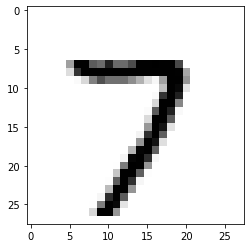

The label of the selected datapoint is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


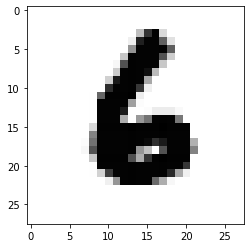

The label of the selected datapoint is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


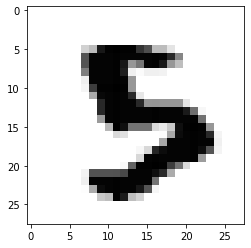

The label of the selected datapoint is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


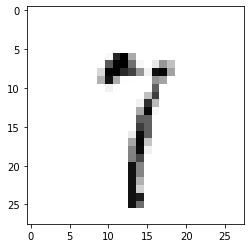

The label of the selected datapoint is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


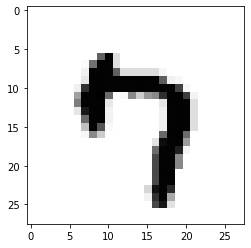

The label of the selected datapoint is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


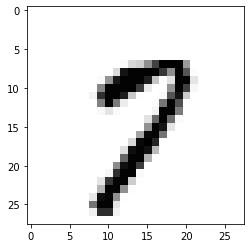

In [ ]:
image_indices = [1, 10, 124, 235, 535, 999]
for image_index in image_indices:
    print(f'The label of the selected datapoint is: {y_train[image_index]}')
    plt.imshow(x_train[image_index], cmap='Greys')
    plt.show()

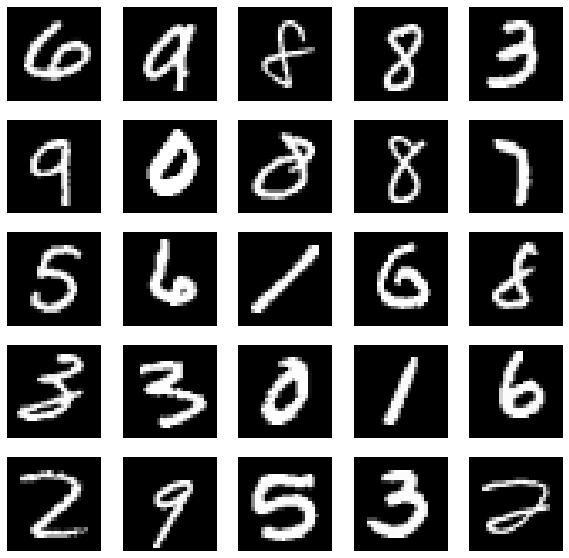

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

### 2. Setup1: Create a CNN architecture having:

##### (a) a kernel size of 5×5, followed by kernel of 2x2. Use 10 feature maps for the first convolution layer and 20 for the second.

##### (b). Add pooling after each co nvolution.
##### (c). Add a linear layer with 50 neurons. Finally, add a classification head. Use softmax activation function at classification head.
##### (d). In the above setup you are free to test varying pooling techniques, LR rates, optimisers and activation functions, strides and padding.

In [ ]:
#############################  STEUP - 1  #####################################

setup_1_model_1 = Sequential()

setup_1_model_1.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
setup_1_model_1.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_1.add(Conv2D(20, kernel_size=(2, 2), activation='relu'))
setup_1_model_1.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_1.add(Flatten())

setup_1_model_1.add(Dense(50, activation='linear'))

setup_1_model_1.add(Dense(10, activation='softmax'))

setup_1_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_setup_1_model_1 = setup_1_model_1.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))

score11 = setup_1_model_1.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', score11[1])

Epoch 1/30
399/399 [==============================] - 4s 7ms/step - loss: 2.8476 - accuracy: 0.8355 - val_loss: 0.4676 - val_accuracy: 0.9208
Epoch 2/30
399/399 [==============================] - 3s 8ms/step - loss: 0.3063 - accuracy: 0.9412 - val_loss: 0.2710 - val_accuracy: 0.9430
Epoch 3/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1758 - accuracy: 0.9587 - val_loss: 0.1652 - val_accuracy: 0.9610
Epoch 4/30
399/399 [==============================] - 2s 5ms/step - loss: 0.1243 - accuracy: 0.9673 - val_loss: 0.1503 - val_accuracy: 0.9617
Epoch 5/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0950 - accuracy: 0.9734 - val_loss: 0.1365 - val_accuracy: 0.9660
Epoch 6/30
399/399 [==============================] - 3s 6ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.1284 - val_accuracy: 0.9691
Epoch 7/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9788 - val_loss: 0.1066 - val_accuracy: 0.9717
Epoch 

In [ ]:
setup_1_model_2 = Sequential()

setup_1_model_2.add(Conv2D(10, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
setup_1_model_2.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_2.add(Conv2D(20, kernel_size=(2, 2), activation='sigmoid'))
setup_1_model_2.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_2.add(Flatten())

setup_1_model_2.add(Dense(50, activation='linear'))

setup_1_model_2.add(Dense(10, activation='softmax'))

setup_1_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_setup_1_model_2 = setup_1_model_2.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))
score12 = setup_1_model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score12[1])

Epoch 1/30
399/399 [==============================] - 4s 6ms/step - loss: 1.0117 - accuracy: 0.7044 - val_loss: 0.3564 - val_accuracy: 0.8929
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.2583 - accuracy: 0.9238 - val_loss: 0.2253 - val_accuracy: 0.9320
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1653 - accuracy: 0.9502 - val_loss: 0.1459 - val_accuracy: 0.9579
Epoch 4/30
399/399 [==============================] - 2s 5ms/step - loss: 0.1281 - accuracy: 0.9603 - val_loss: 0.1249 - val_accuracy: 0.9627
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.1074 - accuracy: 0.9666 - val_loss: 0.1118 - val_accuracy: 0.9678
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9701 - val_loss: 0.0963 - val_accuracy: 0.9693
Epoch 7/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0853 - accuracy: 0.9732 - val_loss: 0.1033 - val_accuracy: 0.9672
Epoch 

In [ ]:
setup_1_model_3 = Sequential()

setup_1_model_3.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
setup_1_model_3.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_3.add(Conv2D(20, kernel_size=(2, 2), activation='relu'))
setup_1_model_3.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_3.add(Flatten())

setup_1_model_3.add(Dense(50, activation='linear'))

setup_1_model_3.add(Dense(10, activation='softmax'))

setup_1_model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_setup_1_model_3 = setup_1_model_3.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))
score13 = setup_1_model_3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score13[1])

Epoch 1/30
399/399 [==============================] - 3s 5ms/step - loss: 1.8201 - accuracy: 0.8765 - val_loss: 0.1961 - val_accuracy: 0.9483
Epoch 2/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1251 - accuracy: 0.9657 - val_loss: 0.1220 - val_accuracy: 0.9670
Epoch 3/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9757 - val_loss: 0.2212 - val_accuracy: 0.9409
Epoch 4/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0629 - accuracy: 0.9814 - val_loss: 0.0963 - val_accuracy: 0.9741
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.1124 - val_accuracy: 0.9724
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.1346 - val_accuracy: 0.9662
Epoch 7/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0920 - val_accuracy: 0.9780
Epoch 

In [ ]:
setup_1_model_4 = Sequential()

setup_1_model_4.add(Conv2D(10, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
setup_1_model_4.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_4.add(Conv2D(20, kernel_size=(2, 2), activation='sigmoid'))
setup_1_model_4.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_4.add(Flatten())

setup_1_model_4.add(Dense(50, activation='linear'))

setup_1_model_4.add(Dense(10, activation='softmax'))

setup_1_model_4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_setup_1_model_4 = setup_1_model_4.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))
score14 = setup_1_model_4.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score14[1])

Epoch 1/30
399/399 [==============================] - 5s 7ms/step - loss: 0.9493 - accuracy: 0.7102 - val_loss: 0.2573 - val_accuracy: 0.9209
Epoch 2/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1859 - accuracy: 0.9426 - val_loss: 0.1861 - val_accuracy: 0.9477
Epoch 3/30
399/399 [==============================] - 3s 7ms/step - loss: 0.1315 - accuracy: 0.9605 - val_loss: 0.1592 - val_accuracy: 0.9479
Epoch 4/30
399/399 [==============================] - 3s 8ms/step - loss: 0.1096 - accuracy: 0.9665 - val_loss: 0.0997 - val_accuracy: 0.9708
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0956 - accuracy: 0.9705 - val_loss: 0.0971 - val_accuracy: 0.9706
Epoch 6/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.9744 - val_loss: 0.1208 - val_accuracy: 0.9624
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.1002 - val_accuracy: 0.9694
Epoch 

In [ ]:
setup_1_model_5 = Sequential()

setup_1_model_5.add(Conv2D(10, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
setup_1_model_5.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_5.add(Conv2D(20, kernel_size=(2, 2), activation='sigmoid'))
setup_1_model_5.add(MaxPooling2D(pool_size=(2, 2)))

setup_1_model_5.add(Flatten())

setup_1_model_5.add(Dense(50, activation='linear'))

setup_1_model_5.add(Dense(10, activation='softmax'))

setup_1_model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_setup_1_model_5 = setup_1_model_5.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))
score15 = setup_1_model_5.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score15[1])

Epoch 1/10
399/399 [==============================] - 3s 5ms/step - loss: 0.8744 - accuracy: 0.7461 - val_loss: 0.2602 - val_accuracy: 0.9257
Epoch 2/10
399/399 [==============================] - 2s 5ms/step - loss: 0.2034 - accuracy: 0.9401 - val_loss: 0.1646 - val_accuracy: 0.9523
Epoch 3/10
399/399 [==============================] - 2s 5ms/step - loss: 0.1446 - accuracy: 0.9567 - val_loss: 0.1272 - val_accuracy: 0.9636
Epoch 4/10
399/399 [==============================] - 2s 6ms/step - loss: 0.1164 - accuracy: 0.9642 - val_loss: 0.1236 - val_accuracy: 0.9644
Epoch 5/10
399/399 [==============================] - 2s 5ms/step - loss: 0.1000 - accuracy: 0.9689 - val_loss: 0.1078 - val_accuracy: 0.9674
Epoch 6/10
399/399 [==============================] - 2s 5ms/step - loss: 0.0875 - accuracy: 0.9728 - val_loss: 0.0918 - val_accuracy: 0.9724
Epoch 7/10
399/399 [==============================] - 2s 5ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.0943 - val_accuracy: 0.9718
Epoch 

In [ ]:
perf_setup_1 = pd.DataFrame([score11[1], score12[1], score13[1], score14[1], score15[1]],
             ['Model-1', 'Model-2', 'Model-3', 'Model-4', 'Model-5'], columns = ['Test_Acuuracy'])

perf_setup_1.sort_values('Test_Acuuracy', ascending  = False)

,Test_Acuuracy
Model-4,0.9851
Model-3,0.9839
Model-2,0.9815
Model-1,0.9814
Model-5,0.9775


The best model from setup - 1 is Model-3

### 3. Setup 2: Update setup 1 by adding a residual connection after one of the layers as you deem fit. [2 marks]

In [ ]:
#############################  STEUP - 2  #####################################
# Input
input_layer = keras.layers.Input(shape=(28, 28, 1))

# Convolution Layer - 1
conv1 = keras.layers.Conv2D(10, (5, 5), activation='relu')(input_layer)
pool1 = keras.layers.MaxPooling2D((2, 2))(conv1)

# Convolution Layer - 2
conv2 = keras.layers.Conv2D(20, (5, 5), activation='relu')(pool1)

# Residual Layer
residual = keras.layers.Conv2D(20, (1, 1), strides=(3, 3), padding='same')(conv1)

# Residual Connection
add1 = keras.layers.add([conv2, residual])
pool2 = keras.layers.MaxPooling2D((2, 2))(add1)

flatten = keras.layers.Flatten()(pool2)
dense1 = keras.layers.Dense(50, activation='relu')(flatten)
output_layer = keras.layers.Dense(10, activation='softmax')(dense1)
##################################################################

model_setup_2 = keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model_setup_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_setup2 = model_setup_2.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1594/1594 [==============================] - 10s 5ms/step - loss: 0.9447 - accuracy: 0.8601 - val_loss: 0.1955 - val_accuracy: 0.9454
Epoch 2/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1402 - accuracy: 0.9606 - val_loss: 0.1096 - val_accuracy: 0.9711
Epoch 3/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0903 - accuracy: 0.9732 - val_loss: 0.0881 - val_accuracy: 0.9756
Epoch 4/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0713 - accuracy: 0.9785 - val_loss: 0.1607 - val_accuracy: 0.9580
Epoch 5/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0611 - accuracy: 0.9817 - val_loss: 0.0899 - val_accuracy: 0.9782
Epoch 6/30
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 7/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0879 - val_accuracy

In [ ]:
score2 = model_setup_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score2[1])

Test accuracy: 0.9840999841690063


**Model 4 from setup 1 performs the best**

### 4. Generate the following plots for each setup: [5 marks]
○ Loss plot - Training Loss and Validation Loss V/s Epochs.

○ Accuracy plot - Training Accuracy, Validation Accuracy V/s Epochs

○ Analyze and Explain the plots obtained

#### PLOT FOR BEST MODEL FROM SETUP - 1

Text(0, 0.5, 'Accuracy')

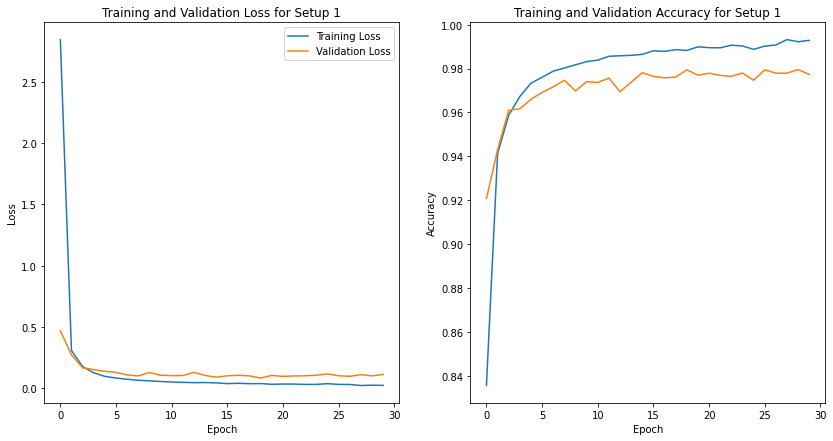

In [ ]:
# Loss Plot - Setup - 1
plt.figure(figsize=(14, 7))

# Plot the training and validation loss for Setup 1
plt.subplot(1, 2, 1)
plt.plot(history_setup_1_model_1.history['loss'], label='Training Loss')
plt.plot(history_setup_1_model_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Setup 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plot the training and validation accuracy for Setup 2
plt.subplot(1, 2, 2)
plt.plot(history_setup_1_model_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_setup_1_model_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Setup 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#### PLOT FOR SETUP 2

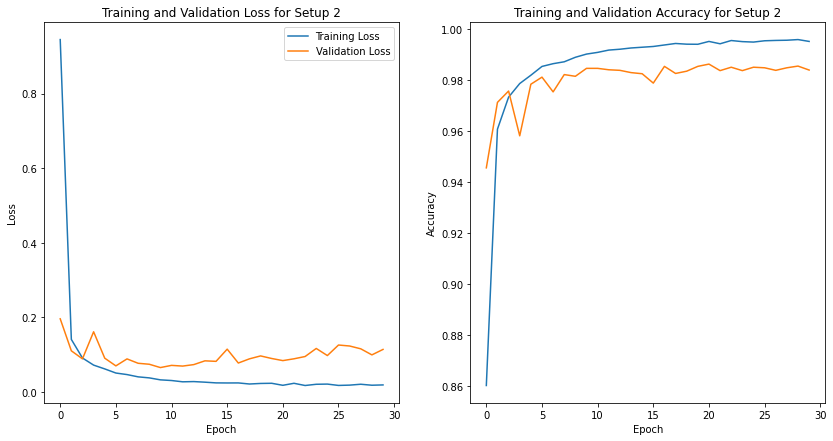

In [ ]:
# Loss Plot - Setup - 2 
plt.figure(figsize=(14, 7))

# Plot the training and validation loss for Setup 2
plt.subplot(1, 2, 1)
plt.plot(history_setup2.history['loss'], label='Training Loss')
plt.plot(history_setup2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Setup 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plot the training and validation accuracy for Setup 2
plt.subplot(1, 2, 2)
plt.plot(history_setup2.history['accuracy'], label='Training Accuracy')
plt.plot(history_setup2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Setup 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()